In [1]:
#.libPaths(c("/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1","/home/data/refdir/Rlib"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
#library(CARD)
library(ggplot2)
rm(list=ls())
library(harmony)
setwd('/home/data/t060324/jobs/aimin/')

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians

In [2]:
sample <- list.files(path = './data/GSE211956_RAW/',pattern = '_ST.RDS')
names(sample) <- substr(sample,1,10)
sample

GSM6506110          GSM6506111          GSM6506112          GSM6506113 
"GSM6506110_ST.RDS" "GSM6506111_ST.RDS" "GSM6506112_ST.RDS" "GSM6506113_ST.RDS" 
         GSM6506114          GSM6506115          GSM6506116          GSM6506117 
"GSM6506114_ST.RDS" "GSM6506115_ST.RDS" "GSM6506116_ST.RDS" "GSM6506117_ST.RDS"

In [3]:
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [4]:
library(AUCell)

[1] "GSM6506110"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
1110.00 1175.39 1245.95 1341.70 2409.00 4240.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_134, c1_587, c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	67 (35% of 189)
	c1_7: 	48 (10% of 497)
	c1_14: 	22 (24% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	22 (56% of 39)
	c1_111: 	17 (17% of 98)
	c1_112: 	32 (50% of 64)
	c1_159: 	11 (14% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	12 (55% of 22)
	c1_564: 	13 (22% of 58)
	c1_609: 	10 (15% of 65)
	c1_8: 	98 (75% of 131)
	c1_122: 	7 (11% of 66)
	c1_567: 	23 (49% of 47)
	c1_585: 	19 (59% of 32)
	c1_121: 	7 (6% of 119)
	c1_123: 	5 (7% of 73)
	c1_364: 	6 (19% of 32)
	c1_574: 	5 (12% of 40)
	c1_578: 	6 (6% of 101)
	c1_581: 	7 (16% of 45)
	c1_769: 	2 (3% of 68)



[1] "GSM6506111"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
1465.00 1544.68 1623.00 1662.00 3010.00 5292.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	64 (34% of 189)
	c1_7: 	37 (7% of 497)
	c1_14: 	24 (26% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	22 (56% of 39)
	c1_111: 	14 (14% of 98)
	c1_112: 	32 (50% of 64)
	c1_159: 	13 (16% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	12 (55% of 22)
	c1_564: 	10 (17% of 58)
	c1_609: 	11 (17% of 65)
	c1_8: 	54 (41% of 131)
	c1_122: 	8 (12% of 66)
	c1_134: 	49 (44% of 112)
	c1_567: 	23 (49% of 47)
	c1_585: 	7 (22% of 32)
	c1_587: 	29 (48% of 61)
	c1_121: 	7 (6% of 119)
	c1_123: 	3 (4% of 73)
	c1_364: 	7 (22% of 32)
	c1_574: 	4 (10% of 40)
	c1_578: 	6 (6% of 101)
	c1_581: 	6 (13% of 45)
	c1_769: 	4 (6% of 68)



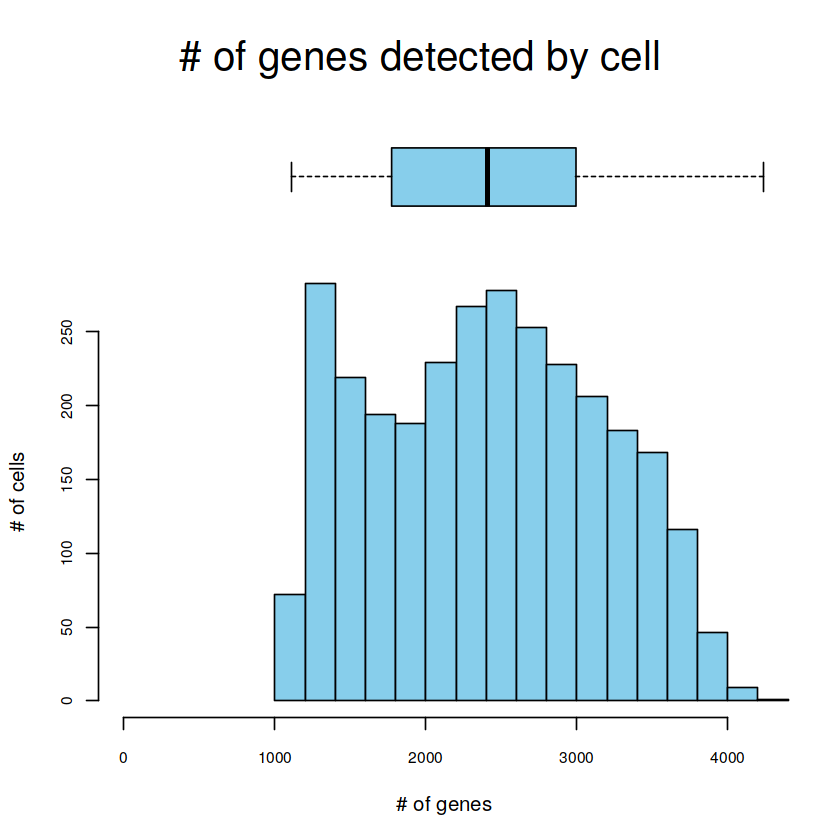

[1] "GSM6506112"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
1413.00 1471.06 1556.15 1683.00 3005.00 5155.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_587, c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	75 (40% of 189)
	c1_7: 	56 (11% of 497)
	c1_14: 	22 (24% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	21 (54% of 39)
	c1_111: 	19 (19% of 98)
	c1_112: 	37 (58% of 64)
	c1_159: 	11 (14% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	12 (55% of 22)
	c1_564: 	12 (21% of 58)
	c1_609: 	10 (15% of 65)
	c1_8: 	97 (74% of 131)
	c1_122: 	6 (9% of 66)
	c1_134: 	88 (79% of 112)
	c1_567: 	27 (57% of 47)
	c1_585: 	17 (53% of 32)
	c1_121: 	8 (7% of 119)
	c1_123: 	10 (14% of 73)
	c1_364: 	5 (16% of 32)
	c1_574: 	7 (18% of 40)
	c1_578: 	7 (7% of 101)
	c1_581: 	5 (11% of 45)
	c1_769: 	3 (4% of 68)



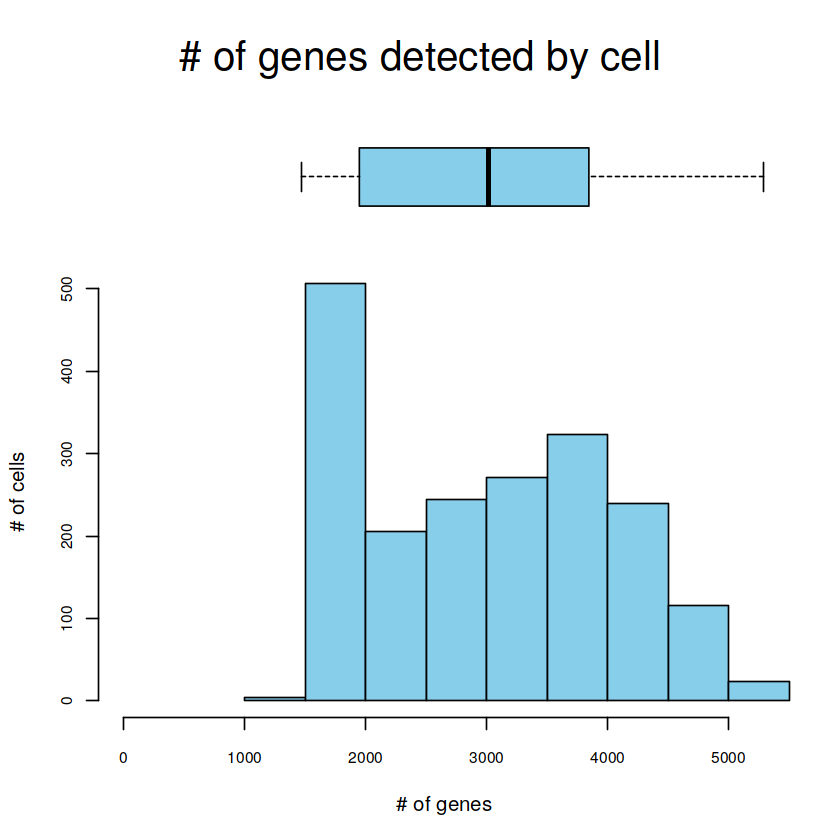

[1] "GSM6506113"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
1153.00 1256.12 1409.00 1561.20 2531.00 4419.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_8, c1_134, c1_587, c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	113 (60% of 189)
	c1_7: 	64 (13% of 497)
	c1_14: 	24 (26% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	20 (51% of 39)
	c1_111: 	44 (45% of 98)
	c1_112: 	49 (77% of 64)
	c1_159: 	13 (16% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	11 (50% of 22)
	c1_564: 	28 (48% of 58)
	c1_609: 	12 (18% of 65)
	c1_122: 	5 (8% of 66)
	c1_567: 	33 (70% of 47)
	c1_585: 	24 (75% of 32)
	c1_121: 	12 (10% of 119)
	c1_123: 	11 (15% of 73)
	c1_364: 	5 (16% of 32)
	c1_574: 	10 (25% of 40)
	c1_578: 	11 (11% of 101)
	c1_581: 	4 (9% of 45)
	c1_769: 	5 (7% of 68)



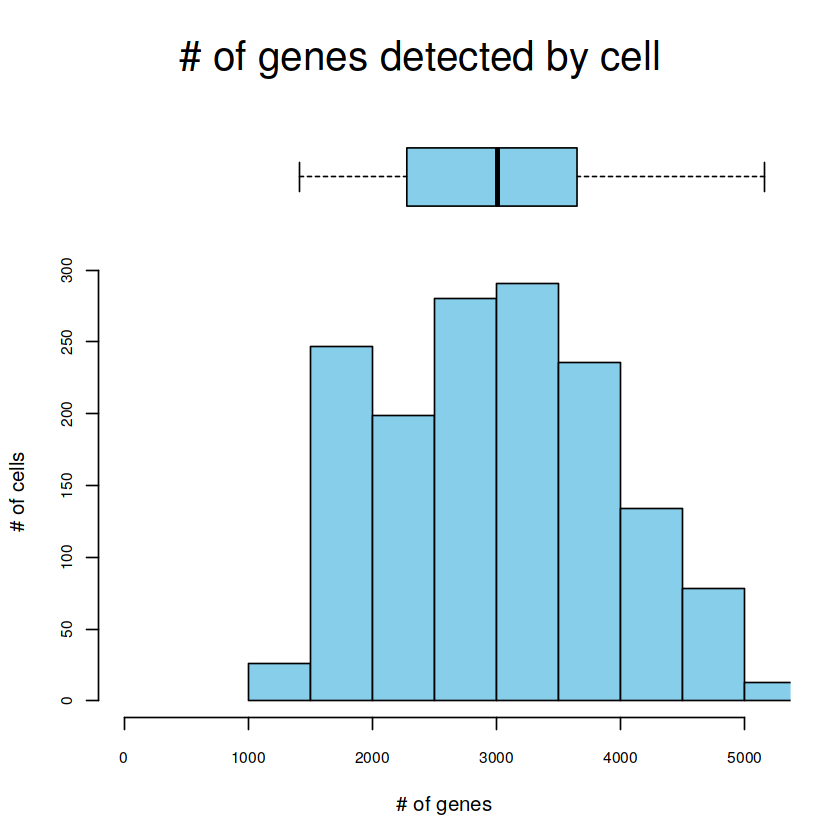

[1] "GSM6506114"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 993.00 1075.23 1113.00 1153.00 2196.00 4593.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	66 (35% of 189)
	c1_7: 	45 (9% of 497)
	c1_14: 	23 (25% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	25 (64% of 39)
	c1_111: 	16 (16% of 98)
	c1_112: 	32 (50% of 64)
	c1_159: 	12 (15% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	13 (59% of 22)
	c1_564: 	11 (19% of 58)
	c1_609: 	10 (15% of 65)
	c1_8: 	73 (56% of 131)
	c1_122: 	4 (6% of 66)
	c1_134: 	65 (58% of 112)
	c1_567: 	23 (49% of 47)
	c1_585: 	9 (28% of 32)
	c1_587: 	38 (62% of 61)
	c1_121: 	10 (8% of 119)
	c1_123: 	4 (5% of 73)
	c1_364: 	7 (22% of 32)
	c1_574: 	5 (12% of 40)
	c1_578: 	9 (9% of 101)
	c1_581: 	4 (9% of 45)
	c1_769: 	3 (4% of 68)



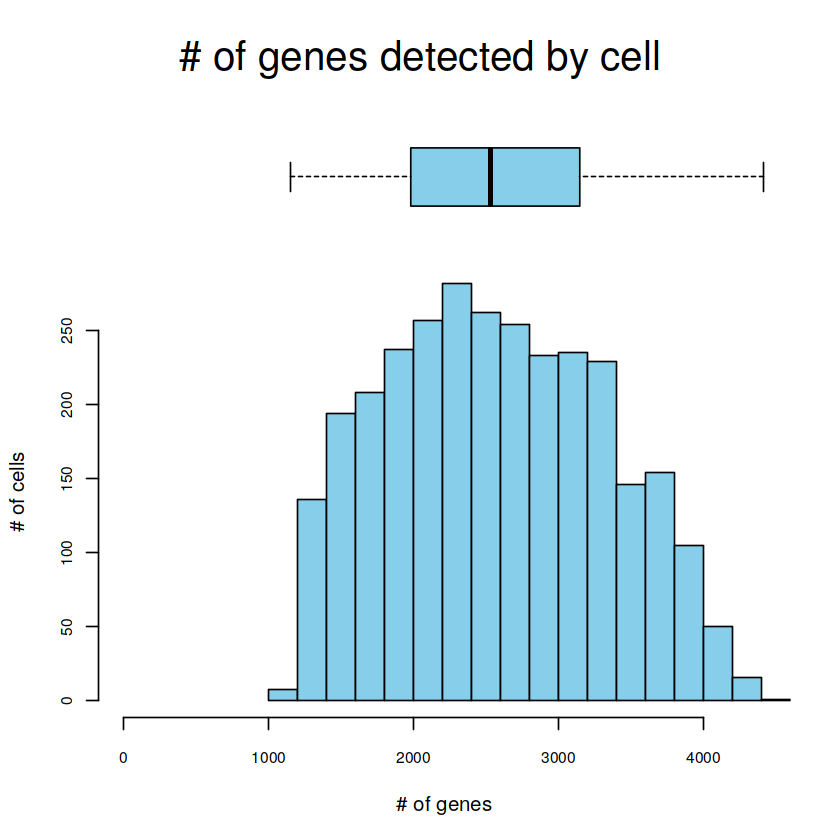

[1] "GSM6506115"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 673 1053 1122 1181 2239 4804 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	68 (36% of 189)
	c1_7: 	48 (10% of 497)
	c1_14: 	23 (25% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	23 (59% of 39)
	c1_111: 	18 (18% of 98)
	c1_112: 	32 (50% of 64)
	c1_159: 	12 (15% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	13 (59% of 22)
	c1_564: 	11 (19% of 58)
	c1_609: 	10 (15% of 65)
	c1_8: 	60 (46% of 131)
	c1_122: 	5 (8% of 66)
	c1_134: 	53 (47% of 112)
	c1_567: 	23 (49% of 47)
	c1_585: 	10 (31% of 32)
	c1_587: 	28 (46% of 61)
	c1_121: 	8 (7% of 119)
	c1_123: 	6 (8% of 73)
	c1_364: 	8 (25% of 32)
	c1_574: 	5 (12% of 40)
	c1_578: 	7 (7% of 101)
	c1_581: 	4 (9% of 45)
	c1_769: 	2 (3% of 68)



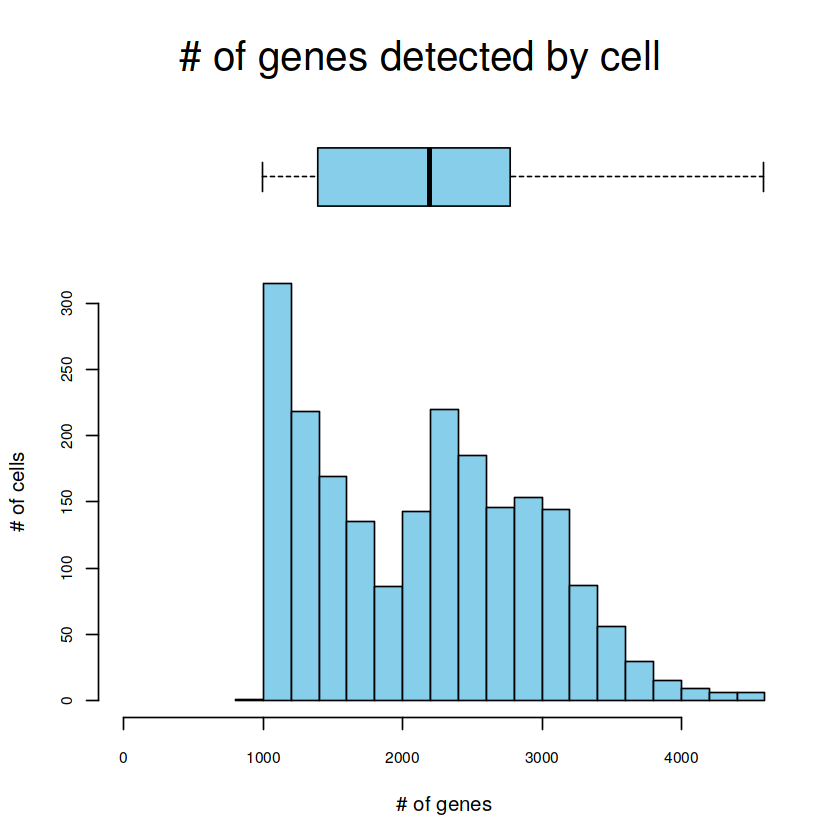

[1] "GSM6506116"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 756.00  791.31  831.00  898.10 1784.00 3500.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_8, c1_134, c1_587, c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	82 (43% of 189)
	c1_7: 	39 (8% of 497)
	c1_14: 	22 (24% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	21 (54% of 39)
	c1_111: 	23 (23% of 98)
	c1_112: 	40 (62% of 64)
	c1_159: 	11 (14% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	12 (55% of 22)
	c1_564: 	15 (26% of 58)
	c1_609: 	10 (15% of 65)
	c1_122: 	4 (6% of 66)
	c1_567: 	29 (62% of 47)
	c1_585: 	21 (66% of 32)
	c1_121: 	9 (8% of 119)
	c1_123: 	5 (7% of 73)
	c1_364: 	5 (16% of 32)
	c1_574: 	5 (12% of 40)
	c1_578: 	8 (8% of 101)
	c1_581: 	4 (9% of 45)
	c1_769: 	2 (3% of 68)



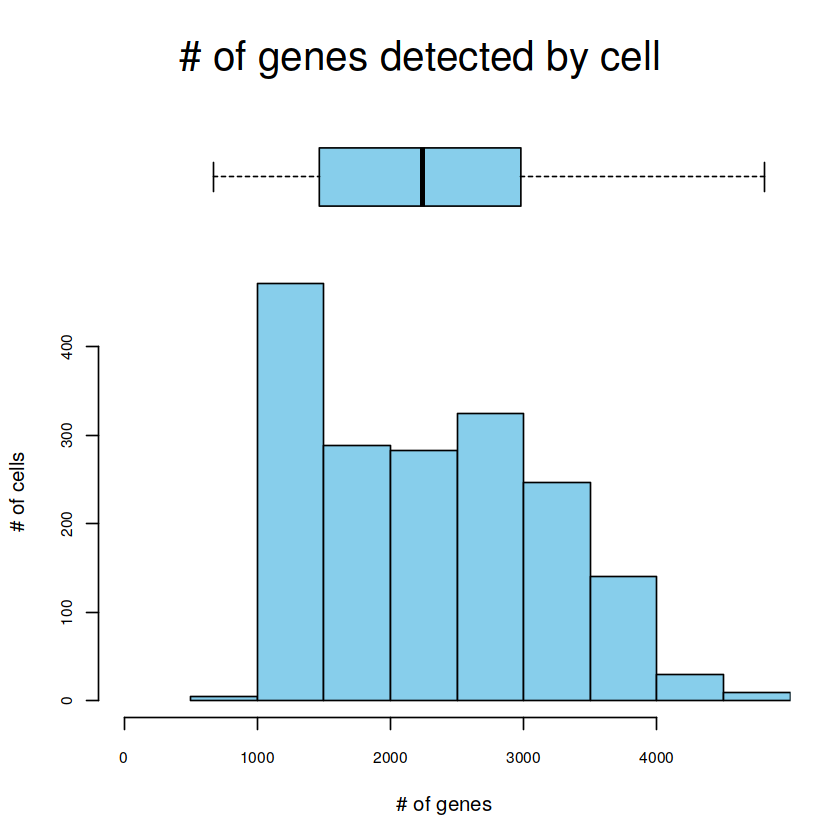

[1] "GSM6506117"


Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 751.00  882.79  986.90 1117.90 2171.50 3939.00 


Warning message in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores, :
“The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
c1_8, c1_134, c1_587, c1_10”
Genes in the gene sets NOT available in the dataset: 
	c1_3: 	68 (36% of 189)
	c1_7: 	42 (8% of 497)
	c1_14: 	23 (25% of 92)
	c1_53: 	6 (14% of 43)
	c1_105: 	20 (51% of 39)
	c1_111: 	17 (17% of 98)
	c1_112: 	33 (52% of 64)
	c1_159: 	12 (15% of 80)
	c1_380: 	3 (14% of 22)
	c1_429: 	3 (10% of 29)
	c1_557: 	11 (50% of 22)
	c1_564: 	11 (19% of 58)
	c1_609: 	10 (15% of 65)
	c1_122: 	4 (6% of 66)
	c1_567: 	24 (51% of 47)
	c1_585: 	20 (62% of 32)
	c1_121: 	7 (6% of 119)
	c1_123: 	9 (12% of 73)
	c1_364: 	6 (19% of 32)
	c1_574: 	5 (12% of 40)
	c1_578: 	6 (6% of 101)
	c1_581: 	4 (9% of 45)
	c1_769: 	3 (4% of 68)



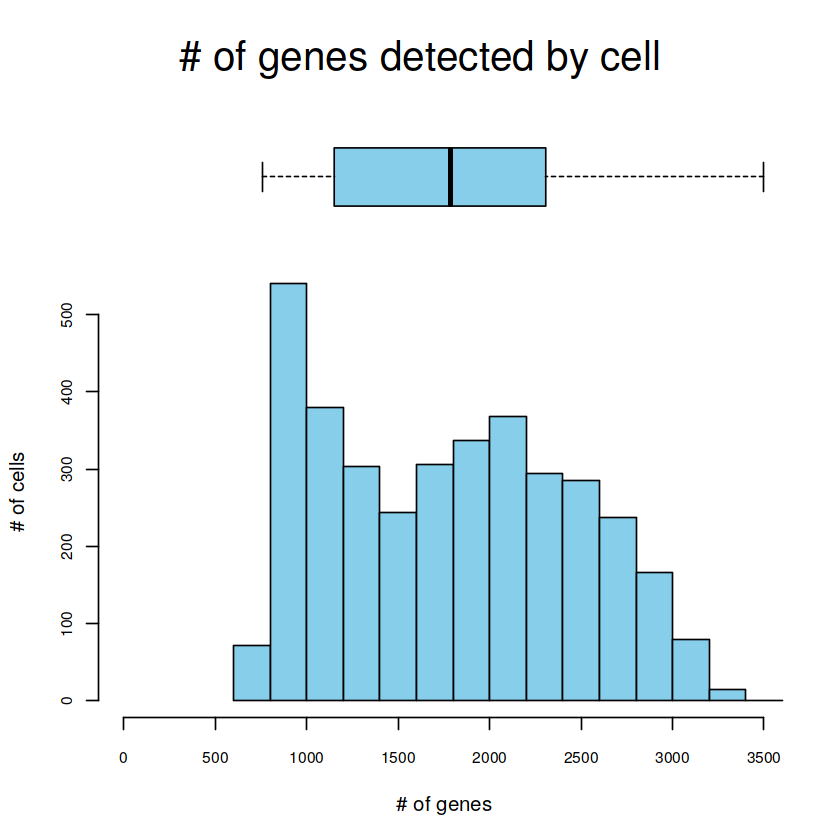

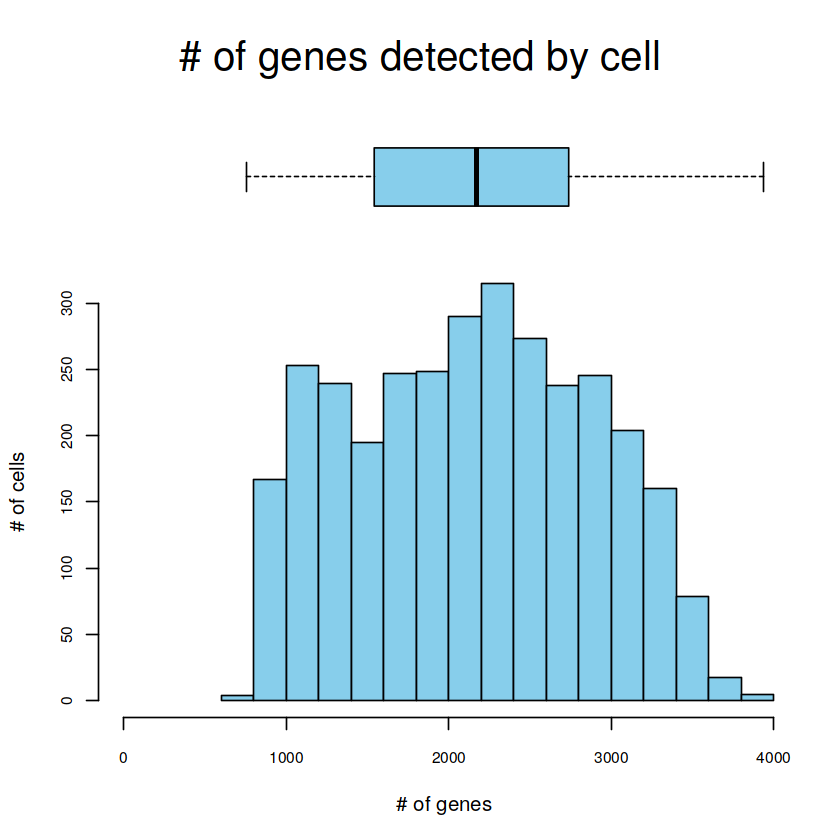

In [5]:
ST_obj_list <- list()
for(sampleFile in names(sample)){
    ST_obj <- readRDS(file = paste0('./data/GSE211956_RAW/',sample[sampleFile]))
    print(sampleFile)
    ST_obj$sample <- sampleFile
    ST_obj$mitoRatio <- PercentageFeatureSet(object = ST_obj, pattern = "^MT-")
    ST_obj$mitoRatio <- ST_obj@meta.data$mitoRatio / 100
    ST_obj$log10GenesPerUMI <- log10(ST_obj$nFeature_Spatial)/log10(ST_obj$nCount_Spatial)
    ST_obj$riboRatio <- PercentageFeatureSet(object = ST_obj, pattern = "^RP[SL]")
    ST_obj$riboRatio <- ST_obj@meta.data$mitoRatio / 100
    cells_rankings <- AUCell_buildRankings(ST_obj@assays$SCT@data)
    cells_AUC <- AUCell_calcAUC(modules_list, cells_rankings, aucMaxRank=nrow(cells_rankings)*0.1)
    ST_obj$M53 <- as.numeric(getAUC(cells_AUC)['c1_53', ])
    ST_obj$M769 <- as.numeric(getAUC(cells_AUC)['c1_769', ])
    ST_obj$CXCL10 <- ifelse(c(ST_obj@assays$Spatial@counts['CXCL10',]+ST_obj@assays$Spatial@counts['CXCL11',]+ST_obj@assays$Spatial@counts['CXCL9',])>1,'Positive','Negative')
    ST_obj_list[[sampleFile]] <- ST_obj@meta.data
}

In [6]:
ST_metaResponse <- data.frame(sample=c('GSM6506110','GSM6506111','GSM6506112','GSM6506113','GSM6506114','GSM6506115','GSM6506116','GSM6506117'),
                              response=c('poor','good','good','partial','good','partial','poor','poor')
                             )
rownames(ST_metaResponse) <- ST_metaResponse$sample

In [7]:
ST_metaResponse$CXCL10_count <- 0
ST_metaResponse$ROS_medin <- 0
ST_metaResponse$cellCycle_medin <- 0
ST_metaResponse$fibo <- 0
ST_metaResponse$mitoRatio<- 0
ST_metaResponse$riboRatio<- 0
ST_metaResponse$log10GenesPerUMI<- 0
ST_metaResponse$nCount<- 0
ST_metaResponse$nFeature<- 0
for(sampleFile in names(sample)){
    ST_metaResponse[sampleFile,'CXCL10_count'] <- sum(ST_obj_list[[sampleFile]]$CXCL10=='Positive')/nrow(ST_obj_list[[sampleFile]])
    ST_metaResponse[sampleFile,'ROS_medin'] <- median(ST_obj_list[[sampleFile]]$M53)
    ST_metaResponse[sampleFile,'cellCycle_medin'] <- median(ST_obj_list[[sampleFile]]$M769)
    ST_metaResponse[sampleFile,'fibo'] <- median(ST_obj_list[[sampleFile]]$fibo,na.rm = T)
    ST_metaResponse[sampleFile,'mitoRatio'] <- median(ST_obj_list[[sampleFile]]$mitoRatio,na.rm = T)
    ST_metaResponse[sampleFile,'riboRatio'] <- median(ST_obj_list[[sampleFile]]$riboRatio,na.rm = T)
    ST_metaResponse[sampleFile,'log10GenesPerUMI'] <- median(ST_obj_list[[sampleFile]]$log10GenesPerUMI,na.rm = T)
    ST_metaResponse[sampleFile,'nCount'] <- median(ST_obj_list[[sampleFile]]$nCount_Spatial,na.rm = T)
    ST_metaResponse[sampleFile,'nFeature'] <- median(ST_obj_list[[sampleFile]]$nFeature_Spatial,na.rm = T)
}


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




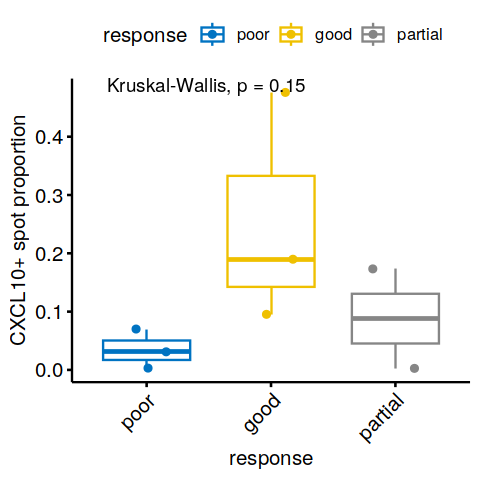

In [9]:
library(ggpubr)
options(repr.plot.height = 10, repr.plot.width = 20)
p3 <- ggstripchart(data = ST_metaResponse,x = 'response',y = 'CXCL10_count',show.legend = TRUE ,ylab = 'CXCL10+ spot proportion',color = 'response',add='boxplot',palette = "jco")+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+stat_compare_means()
options(repr.plot.height =4, repr.plot.width = 4)
p3

In [10]:
pdf(file = './output/bulk/section_6/3.ST_CXCL10Spot_boxplot.pdf',width = 4,height = 4)
print(p3)
dev.off()

png 
  2

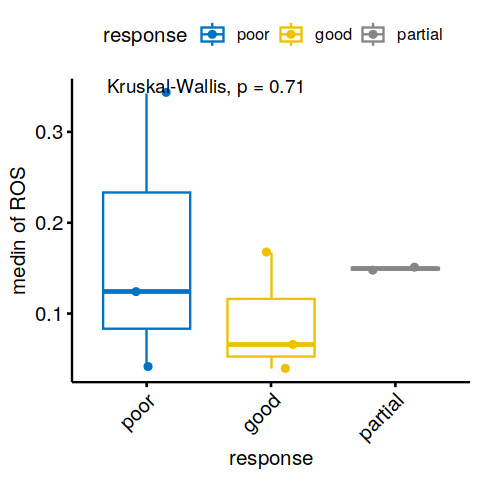

In [11]:
library(ggpubr)
options(repr.plot.height = 10, repr.plot.width = 20)
p4 <- ggstripchart(data = ST_metaResponse,x = 'response',y = 'ROS_medin',show.legend = TRUE ,ylab = 'medin of ROS',color = 'response',add='boxplot',palette = "jco")+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+stat_compare_means()
options(repr.plot.height =4, repr.plot.width = 4)
p4

In [12]:
pdf(file = './output/bulk/section_6/3.ST_M53Spot_boxplot.pdf',width = 4,height = 4)
print(p4)
dev.off()

png 
  2